# Grama Basics

*Purpose*: We will make use of the grama package to work with *models*, which will give us a powerful toolkit to explore and make sense of physical scenarios. To that end, in this exercise we'll go through a brief introduction to the grama package.


## Setup


In [2]:
import grama as gr
DF = gr.Intention()
%matplotlib inline

# Grama Verbs

Grama is organized around two object classes and four verb classes: The objects are

- Data (`df`), as represented by a `pd.DataFrame`: Represents observations from physical experiments, simulations from models, and so on.
- Models (`md`), as represented by a `gr.Model`: Represents a model, including inputs, functions providing outputs, and uncertainties.

The four verb classes allow us to move between the two object types, as summarized in the image below:



![Grama verb class diagram](./images/verb-classes.png)


## Verb Classes

Functions in grama are best thought of as "verbs": functions that perform a specified action. The verb classes map between data and models. Every grama verb starts with a two-letter prefix, which gives us a hint as to how the verbs should be used. We've already seen a variety of transformation `tf_*` verbs for working with data. There are four primary verb classes, with an additional class for plotting.

| Class | Prefix | In | Out |
|-------|--------|----|-----|
| Transform | `tf_*` | `df` | `df` |
| Composition | `cp_*` | `md` | `md` |
| Fitting | `ft_*` | `df` | `md` |
| Evaluation | `ev_*` | `md` | `df` |
| Plotting | `pt_*` | `df` | (Plot) |


# Working with (Grama) models

Grama is best-explained by way of a simple example. The following code initializes a grama model for a [cantilever beam](https://en.wikipedia.org/wiki/Cantilever). There is a large amount of mathematical theory about cantilever beams, but we will ignore most of that theory for the moment.


In [3]:
from grama.models import make_cantilever_beam
md_beam = make_cantilever_beam()

## Model summary

Grama models contain a large amount of mathematical structure. Evaluation `ev_*` verbs help us make use of that structure to generate data that we can mine for insights. However, before we can start evaluating a model, we need to know some basic facts about it. To that end, let's take a look at a *summary* of the example beam model.


### __q1__ Inspect a model summary

Printing the model gives a high-level summary of the model. Run the code below, and answer the questions under *observations* below.


In [4]:
# TASK: No need to edit; run and inspect
md_beam

model: Cantilever Beam

  inputs:
    var_det:
      w: [2, 4]
      t: [2, 4]

    var_rand:
      H: (+1) norm, {'loc': 500.0, 'scale': 100.0}
      V: (+1) norm, {'loc': 1000.0, 'scale': 100.0}
      E: (+0) norm, {'loc': 29000000.0, 'scale': 1450000.0}
      Y: (-1) norm, {'loc': 40000.0, 'scale': 2000.0}

    copula:
      Independence copula

  functions:
      cross-sectional area: ['w', 't'] -> ['c_area']
      limit state: stress: ['w', 't', 'H', 'V', 'E', 'Y'] -> ['g_stress']
      limit state: displacement: ['w', 't', 'H', 'V', 'E', 'Y'] -> ['g_disp']

*Observations*

<!-- task-begin -->
- What input variables `inputs` does the model have?
  - (Your response here)
- Which variables are deterministic `det`?
  - (Your response here)
- Which variables are random `rand`?
  - (Your response here)
- What functions does the model have?
  - (Your response here)
- What outputs do those functions provide?
  - (Your response here)
<!-- task-end -->
<!-- solution-begin -->
- What variables `var` does the model have?
  - t, w, H, V, E, Y
- Which variables are deterministic `det`?
  - t, w
- Which variables are random `rand`?
  - H, V, E, Y
- What functions does the model have?
  - cross-sectional area, limit state: stress, limit state: displacement
- What outputs do those functions provide?
  - c_area, g_stress, g_disp
<!-- solution-end -->

## Importance of context

Models are much more than *just* mathematical statements; they are used in a particular context. Grama has no way to store the infinite complexities of context in something as rigid as computer code. Thus, when interpreting the results from a model, it is important for the analyst to keep track of this context.

One basic way to record context is to tabulate facts about the inputs and outputs of a model. While this is a small *subset* of the full model context, it is an important subset.

| Symb. | I/O | Meaning | Units | Colloquial Definition |
|-------|-----|---------|-------|-----------------------|
| `t`   | Input | Beam cross-section height | in | A taller beam resists more vertical load |
| `w`   | Input | Beam cross-section width  | in | A wider beam resists more horizontal load |
| `H`   | Input | Tip horizontal force      | lbf | A greater forces leads to higher stress and displacement |
| `V`   | Input | Tip vertical force        | lbf | A greater forces leads to higher stress and displacement |
| `E`   | Input | Elasticity                | psi | A stiffer beam (greater `E`) better resists displacement |
| `Y`   | Input | Yield strength            | psi | A higher strength better resists stress |
|-------|------|---------------------------|-----|------------------------------------------|
| `c_area` | Output | Beam cross-section area | in^2 | A larger beam weights more |
| `g_stress` | Output | Maximum stress failure criterion | (-) | Stress failure can lead to structure collapse |
| `g_disp` | Output | Tip displacement failure criterion | in | Excessive deformation leads to misalignment |

It is also important to note that the failure criteria are formulated such that `g > 0` corresponds to success, and `g <= 0` corresponds to failure.

With this bit of context, we can make more sense of results from the model.


## Generate data from a model

The philosophy behind grama is to generate data from a model and study that data to gain insights about the model. We'll practice this data generation in the next few tasks. First, let's print the model summary again to help with the next task:


In [5]:
# NOTE: No need to edit; us this for reference for the next task
md_beam

model: Cantilever Beam

  inputs:
    var_det:
      w: [2, 4]
      t: [2, 4]

    var_rand:
      H: (+1) norm, {'loc': 500.0, 'scale': 100.0}
      V: (+1) norm, {'loc': 1000.0, 'scale': 100.0}
      E: (+0) norm, {'loc': 29000000.0, 'scale': 1450000.0}
      Y: (-1) norm, {'loc': 40000.0, 'scale': 2000.0}

    copula:
      Independence copula

  functions:
      cross-sectional area: ['w', 't'] -> ['c_area']
      limit state: stress: ['w', 't', 'H', 'V', 'E', 'Y'] -> ['g_stress']
      limit state: displacement: ['w', 't', 'H', 'V', 'E', 'Y'] -> ['g_disp']

### __q2__ DataFrame evaluation

The following code attempts to evaluate the model at specified input values. However, the code has errors. Fix the code below by specifying values for the missing inputs.


In [20]:
# TASK: Add values for the missing variables
(
    md_beam
    >> gr.ev_df(
        df=gr.df_make(
            Y=4e4,
            V=1e3,
            E=29e7,
            H=5e2,
# task-begin
            # Add values for the missing variables
            # See the summary above for reasonable values
# task-end
# solution-begin
            w=3.0,
            t=3.0,
# solution-end
        )
    )
)

,Y,V,E,H,w,t,g_stress,c_area,g_disp
0,40000.0,1000.0,290000000.0,500.0,3.0,3.0,0.166667,9.0,2.063115


The verb `gr.ev_df()` is a very basic evaluation where we have to specify values for every input. However, there are other evaluation verbs that make intelligent choices for us.


### __q3__ Sinew evaluation

Use the verb `gr.ev_sinews()` to generate "sweep" data from the beam model at **nominal** levels for the deterministic inputs. You will need to specify one short keyword argument to complete this task.

*Hint*: Remember that you can put your cursor inside a function's arguments in a code cell and press `Shift + Tab` to bring up the documentation. Use this to determine how to set nominal levels for the deterministic variables.


In [21]:
# TASK: Successfully call gr.ev_sinews() with nominal levels for the deterministic variables
(
    md_beam
# solution-begin
    >> gr.ev_sinews(df_det="nom")
# solution-end
)

,H,Y,V,E,sweep_var,sweep_ind,w,t,g_stress,c_area,g_disp
0,267.365213,38994.115587,854.744123,2.963245e+07,H,0,3.0,3.0,0.351459,9.0,0.761001
1,377.935965,38994.115587,854.744123,2.963245e+07,H,0,3.0,3.0,0.290031,9.0,0.696030
2,423.529033,38994.115587,854.744123,2.963245e+07,H,0,3.0,3.0,0.264701,9.0,0.663784
3,456.927270,38994.115587,854.744123,2.963245e+07,H,0,3.0,3.0,0.246147,9.0,0.638302
4,486.028970,38994.115587,854.744123,2.963245e+07,H,0,3.0,3.0,0.229979,9.0,0.614880
...,...,...,...,...,...,...,...,...,...,...,...
115,681.020898,40279.420598,964.653263,2.979324e+07,Y,2,3.0,3.0,0.092722,9.0,0.296268
116,681.020898,40861.454599,964.653263,2.979324e+07,Y,2,3.0,3.0,0.107273,9.0,0.296268
117,681.020898,41529.419348,964.653263,2.979324e+07,Y,2,3.0,3.0,0.123972,9.0,0.296268
118,681.020898,42441.280698,964.653263,2.979324e+07,Y,2,3.0,3.0,0.146769,9.0,0.296268


A "sinew" evaluation sweeps across input variables while holding the other variables constant. This process is repeated for multiple starting points and for each input variable. We can get a sense for the input values that `gr.ev_sinews()` selects by visualizing part of the input space. The following shows a scatterplot for two of the variables:


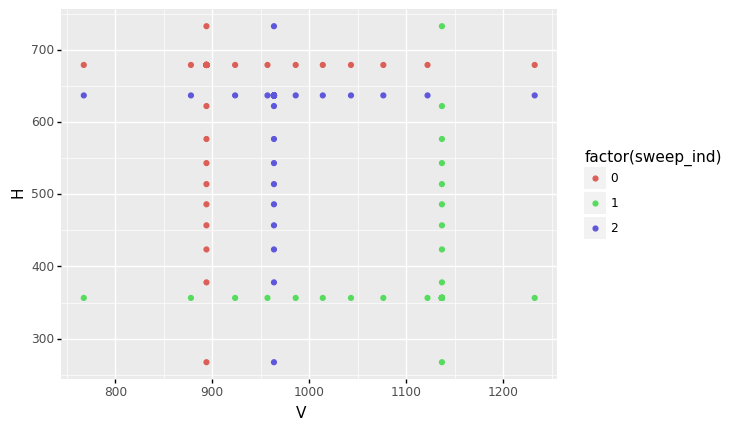

<ggplot: (8761391666740)>

In [22]:
# NOTE: No need to edit; run and inspect
(
    md_beam
    >> gr.ev_sinews(df_det="nom")
    
    >> gr.ggplot(gr.aes("V", "H", color="factor(sweep_ind)"))
    + gr.geom_point()
)

Note that for each sweep (identified by `sweep_ind`) we see a "cross" emanating from a single point outwards, parallel to both coordinate axes. This process is repeated for every input variable in order to generate the data.


## Visualize data from a model

Generating data is only part of working with a model; we must also *study* the data to make sense of it. One of the best ways to study data is to visualize it. We can make manual plots with `ggplot()`, but grama provides a much quicker way: Many evaluation verbs work with the special verb `gr.pt_auto()` to generate a sensible default visualization.


### __q4__ Visualize sinew evaluation data

Use the `gr.pt_auto()` routine to visualize the outputs from the sinew evaluation. Answer the questions under *observations* below.


Calling plot_sinew_outputs....


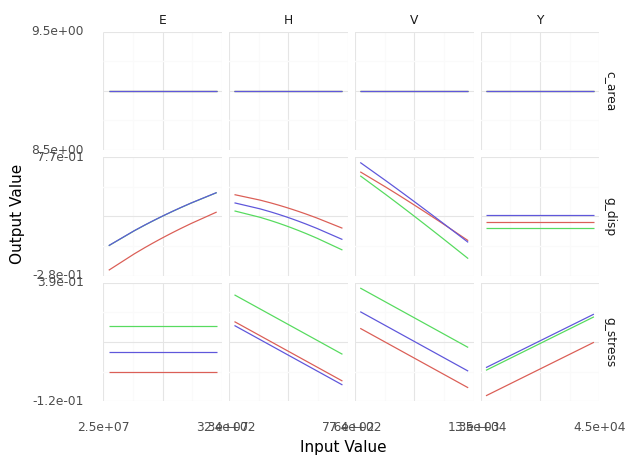

<ggplot: (8761391865338)>

In [23]:
# TASK: Use gr.pt_auto() to visualize the sinew data
(
    md_beam
    >> gr.ev_sinews(df_det="nom")
# solution-begin
    >> gr.pt_auto()
# solution-end
)

*Observations*

<!-- task-begin -->
- Do any inputs affect the output `c_area`? What about `w` or `t`? How do you know? (Or *not* know?)
  - (Your response here)
- Does the input `Y` affect the output `g_disp`? How do you know?
  - (Your response here)
- Does the input `E` increase or decrease `g_disp`?
  - (Your response here)
<!-- task-end -->
<!-- solution-begin -->
- Do any inputs affect the output `c_area`? What about `w` or `t`? How do you know? (Or *not* know?)
  - None of the inputs visualized have any effect on `c_area`. The inputs `w` and `t` have an effect on `c_area`, but we can't tell based on this plot. I know this because `c_area = w * t` is the cross-sectional area of the beam.
- Does the input `Y` affect the output `g_disp`? How do you know?
  - The input `Y` has no effect on `g_disp`; it has zero slope.
- Does the input `E` increase or decrease `g_disp`?
  - The input `E` tends to increase `g_disp`.
<!-- solution-end -->

# Where this course is going

This was just a *brief* introduction to how grama works and what it can do. The rest of this course is about learning tools to make full use of the grama toolkit. The exercises in this course are organized into four different categories (`grama`, `data`, `vis`, and `stat`) that represent four broad areas of working with grama:


## Build, evaluate, and understand a model with grama (`grama`)

We will learn tools to build and sanity-check models using grama. This will involve more evaluation and visualization tools to make sense of models, but also probabilistic tools to build models that encode our uncertainties about a scenario.


## Wrangle data (`data`)

To manage the data outputs from grama models, we will learn a variety of general-purpose wrangling tools. These will help us work with grama models, but the same tools are useful for **any** dataset.


## Visualize data to gain insights (`vis`)

To make sense of data, we will learn a variety of visualization techniques. These will help us gain insights into grama models, but the same techniques are useful for **any** dataset.


## Use statistics to quantify uncertainty (`stat`)

Datasets are always limited and models inherently include uncertainties. Statistics will allow us to *quantify* these uncertainties and make informed decisions using data and models.
